In [81]:
from sympy import *
import numpy

# The first example

In [2]:
x = symbols('x')
x

x

In [3]:
a = Integral(cos(x)*exp(x), x)
a

Integral(exp(x)*cos(x), x)

In [4]:
Eq(a, a.doit())

Eq(Integral(exp(x)*cos(x), x), exp(x)*sin(x)/2 + exp(x)*cos(x)/2)

# What is Symbolic Computation

In [5]:
sqrt(3)

sqrt(3)

In [6]:
sqrt(8)

2*sqrt(2)

# A More Interesting Example

In [7]:
x, y = symbols('x y')
expr = x + 2*y
expr

x + 2*y

In [8]:
expr + 1

x + 2*y + 1

In [9]:
expr - x

2*y

In [10]:
x*expr

x*(x + 2*y)

In [11]:
expanded_expr = expand(x*expr)
expanded_expr

x**2 + 2*x*y

In [12]:
factor(expanded_expr)

x*(x + 2*y)

# The Power of Symbolic Computation

In [13]:
x, t, z, nu = symbols('x t z nu')

In [14]:
init_printing(use_unicode=True)

In [15]:
diff(sin(x)*exp(x), x)

In [16]:
integrate(exp(x)*sin(x) + exp(x)*cos(x), x)

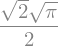

In [25]:
integrate(sin(x**2), (x, -oo, oo))

In [24]:
limit(sin(x)/x, x, 0)

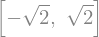

In [26]:
solve(x**2 - 2, x)

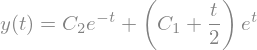

In [27]:
y = Function('y')
dsolve(Eq(y(t).diff(t, t) - y(t), exp(t)), y(t))

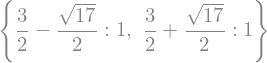

In [28]:
Matrix([[1, 2], [2, 2]]).eigenvals()

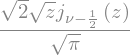

In [29]:
besselj(nu, z).rewrite(jn)

In [30]:
latex(Integral(cos(x)**2, (x, 0, pi)))

'\\int\\limits_{0}^{\\pi} \\cos^{2}{\\left(x \\right)}\\, dx'

# Gotchas

In [39]:
x = symbols('x')
expr = x + 1
expr

In [40]:
expr.subs(x, 2)

In [43]:
Eq((x + 1)**2, x**2 + 2*x + 1)

In [44]:
a = (x + 1)**2
b = x**2 + 2*x + 1
simplify(a - b)

In [45]:
c = x**2 - 2*x + 1
simplify(a - c)

In [46]:
a = cos(x)**2 - sin(x)**2
b = cos(2*x)
a.equals(b)

True

In [47]:
Rational(1, 2)

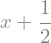

In [48]:
x + Rational(1, 2)

# Substitution

In [52]:
x, y, z = symbols("x y z")
expr = cos(x) + 1
expr

In [53]:
expr.subs(x, y)

In [54]:
expr.subs(x, 0)

In [55]:
expr = x**y
expr

In [56]:
expr = expr.subs(y, x**y)
expr

In [57]:
expr = expr.subs(y, x**x)
expr

In [60]:
expr = sin(2*x) + cos(2*x)
expr

In [61]:
expand_trig(expr)

In [59]:
expr.subs(sin(2*x), 2*sin(x)*cos(x))

In [62]:
expr = cos(x)
expr

In [63]:
expr.subs(x, 0)

In [64]:
expr = x**3 + 4*x*y - z
expr

In [65]:
expr.subs([(x, 2), (y, 4), (z, 0)])

In [67]:
expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
expr

In [69]:
replacements = [(x**i, y**i) for i in range(5) if i % 2 == 0]
replacements

In [70]:
expr.subs(replacements)

# Converting Strings to SymPy Expressions

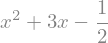

In [71]:
str_expr = "x**2 + 3*x - 1/2"
expr = sympify(str_expr)
expr

In [72]:
expr.subs(x, 2)

# evalf

In [73]:
expr = sqrt(8)
expr.evalf()

In [75]:
pi.evalf(30)

In [76]:
expr = cos(2*x)
expr

In [77]:
expr.evalf(subs={x: 2.4})

In [78]:
one = cos(1)**2 + sin(1)**2
one

In [79]:
(one - 1).evalf()

In [80]:
(one - 1).evalf(chop=True)

In [85]:
expr = sin(x)
expr

# lambdify

In [86]:
f = lambdify(x, expr, "numpy") 
f(numpy.arange(10)) 

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [83]:
f = lambdify(x, expr, "math")
f(0.1)

In [84]:
def mysin(x):
    """
    My sine. Note that this is only accurate for small x.
    """
    return x

f = lambdify(x, expr, {"sin":mysin})
f(0.1)